In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
from ipynb.fs.defs.basic_iteration import plot_function

# 2.c

In [33]:
def g(x, a=0):
    return (a * (x**3)) - (4 * a * x) + x

In [34]:
I = [-3, 3]  # abgeschlossenes Intervall [a,b]
z = 4000  # Anzahl der Funktionsauswertungen, "Feinheit"
N = 40  # Anzahl der Iterationen fürs Cobwebbing

# 3.5

In [35]:
functions = {
    "a": {"f": lambda x: np.exp(-x) - 1, "df": lambda x: -np.exp(-x), "x0s": [1, 3]},
    "b": {"f": lambda x: np.log(x), "df": lambda x: 1 / x, "x0s": [1.5, 3]},
    "c": {
        "f": lambda x: x * (x - 2) * (x - 4),
        "df": lambda x: 3 * x**2 - 12 * x + 8,
        "x0s": [0.5, 2.5, (2 / 3) * (3 - np.sqrt(3)), 0.85],
    },
    "d": {"f": lambda x: np.exp(x) - 1 - x, "df": lambda x: np.exp(x) - 1, "x0s": [1]},
}

In [36]:
# Define Newton's Method
def newton(f, df, xo, tol=1e-12, max_iter=100):
    xk = [
        xo,
    ]
    for i in range(max_iter):
        fx = f(xk[i])
        dfx = df(xk[i])
        if dfx < tol:
            break
        xk.append(xk[i] - (fx / dfx))
        if abs(xk[-1] - xk[-2]) < tol:
            break
    return xk

In [38]:
newton_results = {}
for key, entry in functions.items():
    f = entry["f"]
    df = entry["df"]
    xos = entry["x0s"]
    newton_results[key] = {xo: newton(f, df, xo) for xo in xos}

/var/folders/dz/bzxsk9tj3clf0cs7vg6r7h_80000gn/T/ipykernel_61517/32852012.py:3: RuntimeWarning: invalid value encountered in log
  "b": {"f": lambda x: np.log(x), "df": lambda x: 1 / x, "x0s": [1.5, 3]},


In [44]:
import pandas as pd

# Prepare table data for display
rows = []
for key in newton_results:
    for x0, sequence in newton_results[key].items():
        for k, xk in enumerate(sequence):
            rows.append({
                "Function": key,
                "x0": x0,
                "k": k,
                "x_k": xk
            })

df = pd.DataFrame(rows)
df

,Function,x0,k,x_k
0,a,1.000000,0,1.000000e+00
1,a,3.000000,0,3.000000e+00
2,b,1.500000,0,1.500000e+00
3,b,1.500000,1,8.918023e-01
4,b,1.500000,2,9.939233e-01
5,b,1.500000,3,9.999815e-01
6,b,1.500000,4,1.000000e+00
7,b,1.500000,5,1.000000e+00
8,b,1.500000,6,1.000000e+00
9,b,3.000000,0,3.000000e+00


/var/folders/dz/bzxsk9tj3clf0cs7vg6r7h_80000gn/T/ipykernel_61517/1026423445.py:22: RuntimeWarning: invalid value encountered in log
  "f": lambda x: np.log(x),
/var/folders/dz/bzxsk9tj3clf0cs7vg6r7h_80000gn/T/ipykernel_61517/1026423445.py:65: RuntimeWarning: invalid value encountered in log
  "b": lambda x: np.log(x),


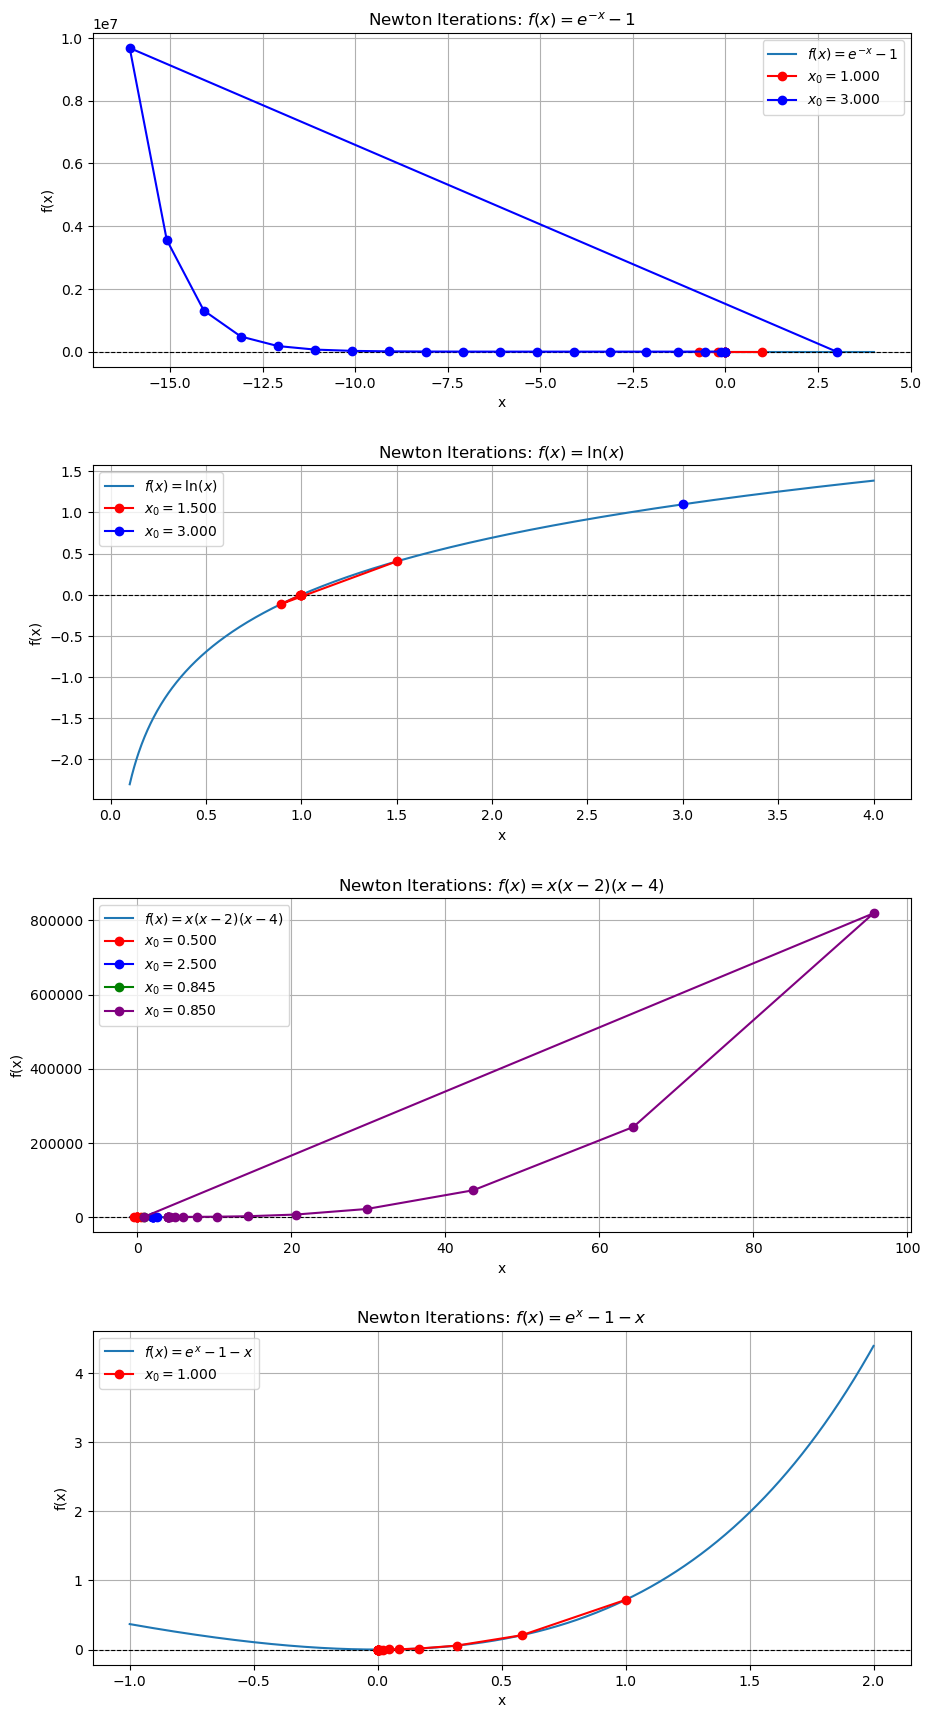

In [47]:
# Redefine newton_results from earlier step
def newton_method(f, df, x0, tol=1e-12, max_iter=20):
    xs = [x0]
    for _ in range(max_iter):
        fx = f(xs[-1])
        dfx = df(xs[-1])
        if abs(dfx) < 1e-12:
            break
        x_next = xs[-1] - fx / dfx
        xs.append(x_next)
        if abs(x_next - xs[-2]) < tol:
            break
    return xs

functions_derivatives = {
    "a": {
        "f": lambda x: np.exp(-x) - 1,
        "df": lambda x: -np.exp(-x),
        "x0s": [1, 3]
    },
    "b": {
        "f": lambda x: np.log(x),
        "df": lambda x: 1/x,
        "x0s": [1.5, 3]
    },
    "c": {
        "f": lambda x: x * (x - 2) * (x - 4),
        "df": lambda x: 3*x**2 - 12*x + 8,
        "x0s": [0.5, 2.5, (2/3)*(3 - np.sqrt(3)), 0.85]
    },
    "d": {
        "f": lambda x: np.exp(x) - 1 - x,
        "df": lambda x: np.exp(x) - 1,
        "x0s": [1]
    }
}

# Compute newton_results
newton_results = {}
for key, entry in functions_derivatives.items():
    f = entry["f"]
    df = entry["df"]
    x0s = entry["x0s"]
    newton_results[key] = {x0: newton_method(f, df, x0) for x0 in x0s}

# Re-run the visualization
fig, axes = plt.subplots(4, 1, figsize=(10, 18))
fig.tight_layout(pad=5.0)

color_map = {1: 'red', 2: 'blue', 3: 'green', 4: 'purple'}
function_titles = {
    "a": r"$f(x) = e^{-x} - 1$",
    "b": r"$f(x) = \ln(x)$",
    "c": r"$f(x) = x(x - 2)(x - 4)$",
    "d": r"$f(x) = e^x - 1 - x$"
}
x_ranges = {
    "a": (-1, 4),
    "b": (0.1, 4),
    "c": (-1, 5),
    "d": (-1, 2)
}
functions = {
    "a": lambda x: np.exp(-x) - 1,
    "b": lambda x: np.log(x),
    "c": lambda x: x * (x - 2) * (x - 4),
    "d": lambda x: np.exp(x) - 1 - x
}

for i, key in enumerate(["a", "b", "c", "d"]):
    ax = axes[i]
    x_range = np.linspace(*x_ranges[key], 1000)
    y_vals = functions[key](x_range)

    ax.plot(x_range, y_vals, label=function_titles[key])
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

    for j, (x0, seq) in enumerate(newton_results[key].items(), start=1):
        xs = np.array(seq)
        ys = functions[key](xs)
        ax.plot(xs, ys, 'o-', label=f"$x_0 = {x0:.3f}$", color=color_map.get(j, 'gray'))

    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.set_title(f"Newton Iterations: {function_titles[key]}")
    ax.grid(True)
    ax.legend()

plt.show()